In [20]:
from pathlib import Path

import pandas as pd
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
dates_to_visualize = [
                                                                                            "2018-09", "2018-10", "2018-11", "2018-12",
    "2019-01", "2019-02", "2019-03", "2019-04", "2019-05", "2019-06", "2019-07", "2019-08", "2019-09", "2019-10", "2019-11", "2019-12", 
    "2020-01", "2020-02", "2020-03", "2020-04", "2020-05", "2020-06", "2020-07", "2020-08", "2020-09", "2020-10", "2020-11", "2020-12",
    "2021-01", "2021-02", "2021-03", "2021-04", "2021-05", "2021-06", "2021-07", "2021-08", "2021-09", "2021-10", "2021-11", "2021-12",
    "2022-01", "2022-02", "2022-03", "2022-04", "2022-05", "2022-06", "2022-07", "2022-08", "2022-09", "2022-10", "2022-11", "2022-12",
    "2023-01", "2023-02",
    # "2024-02",
]

In [3]:
available_data_files = list(Path("../data/httparchive_metrics/nel_config").glob("*.parquet"))

used_data_files = list(filter(lambda file: file.stem.split("_")[-1] in dates_to_visualize, available_data_files))
used_data_files

[WindowsPath('../data/httparchive_metrics/nel_config/failure_fraction_2018-09.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/failure_fraction_2018-10.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/failure_fraction_2018-11.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/failure_fraction_2018-12.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/failure_fraction_2019-02.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/failure_fraction_2019-03.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/failure_fraction_2019-04.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/failure_fraction_2019-05.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/failure_fraction_2019-06.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/failure_fraction_2019-07.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/failure_fraction_2019-08.parquet'),
 WindowsPath('../data

### Failure fraction configuration over months


In [4]:
# Pick out the Failure Fraction files
ff_files = list(filter(lambda file: file.stem[:file.stem.rfind("_")] == 'failure_fraction', used_data_files))
ff_files

[WindowsPath('../data/httparchive_metrics/nel_config/failure_fraction_2018-09.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/failure_fraction_2018-10.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/failure_fraction_2018-11.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/failure_fraction_2018-12.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/failure_fraction_2019-02.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/failure_fraction_2019-03.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/failure_fraction_2019-04.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/failure_fraction_2019-05.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/failure_fraction_2019-06.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/failure_fraction_2019-07.parquet'),
 WindowsPath('../data/httparchive_metrics/nel_config/failure_fraction_2019-08.parquet'),
 WindowsPath('../data

### Aggregate results to visualize

In [5]:
from results.result_utils import concat_data_from_files

ff_data = concat_data_from_files(ff_files)
ff_data['nel_failure_fraction'] = ff_data['nel_failure_fraction'].astype('Float32')
ff_data

,date,nel_failure_fraction,domain_count,domain_percent
0,2018-09,1.0,2,100.000000
0,2018-10,1.0,10,100.000000
0,2018-11,0.001,127,67.914439
1,2018-11,1.0,53,28.342246
2,2018-11,0.25,7,3.743316
...,...,...,...,...
14,2023-02,0.99999,1,0.000044
15,2023-02,0.15,4,0.000177
16,2023-02,0.9,5,0.000221
17,2023-02,0.1,2,0.000089


In [9]:
from results.result_utils import get_first_or_0, date_to_text_format

ff_result = pd.DataFrame({}, index=[
    '0.00',
    '0.00-0.01',
    '0.01',
    '0.01-0.05',
    '0.05',
    '0.05-0.10',
    '0.10',
    '0.10-0.25',
    '0.25',
    '0.25-0.50',
    '0.50',
    '0.50-1.00',
    '1.00',
])

for date in dates_to_visualize:
    month_ff_data = ff_data[ff_data['date'] == date]
    
    month_data_col = []
    
    # month_result['0.00']
    next_val = month_ff_data[month_ff_data['nel_failure_fraction'] == 0].groupby(['date'])['domain_count'].sum()
    month_data_col.append(get_first_or_0(next_val))
    
    # month_result['0.00-0.01'] 
    next_val = month_ff_data[(month_ff_data['nel_failure_fraction'] > 0) & (month_ff_data['nel_failure_fraction'] < 0.01)].groupby(['date'])['domain_count'].sum()
    month_data_col.append(get_first_or_0(next_val))

    # month_result['0.01']
    next_val = month_ff_data[month_ff_data['nel_failure_fraction'] == 0.01].groupby(['date'])['domain_count'].sum()
    month_data_col.append(get_first_or_0(next_val))
    
    # month_result['0.01-0.05']
    next_val = month_ff_data[(month_ff_data['nel_failure_fraction'] > 0.01) & (month_ff_data['nel_failure_fraction'] < 0.05)].groupby(['date'])['domain_count'].sum()
    month_data_col.append(get_first_or_0(next_val))
    
    # month_result['0.05'] 
    next_val = month_ff_data[month_ff_data['nel_failure_fraction'] == 0.05].groupby(['date'])['domain_count'].sum()
    month_data_col.append(get_first_or_0(next_val))

    # month_result['0.05-0.10'] 
    next_val = month_ff_data[(month_ff_data['nel_failure_fraction'] > 0.05) & (month_ff_data['nel_failure_fraction'] < 0.10)].groupby(['date'])['domain_count'].sum()
    month_data_col.append(get_first_or_0(next_val))

    # month_result['0.10']
    next_val = month_ff_data[month_ff_data['nel_failure_fraction'] == 0.10].groupby(['date'])['domain_count'].sum()
    month_data_col.append(get_first_or_0(next_val))
    
    # month_result['0.10-0.25']
    next_val = month_ff_data[(month_ff_data['nel_failure_fraction'] > 0.10) & (month_ff_data['nel_failure_fraction'] < 0.25)].groupby(['date'])['domain_count'].sum()
    month_data_col.append(get_first_or_0(next_val))
    
    # month_result['0.25']
    next_val = month_ff_data[month_ff_data['nel_failure_fraction'] == 0.25].groupby(['date'])['domain_count'].sum()
    month_data_col.append(get_first_or_0(next_val))

    # month_result['0.25-0.50']
    next_val = month_ff_data[(month_ff_data['nel_failure_fraction'] > 0.25) & (month_ff_data['nel_failure_fraction'] < 0.50)].groupby(['date'])['domain_count'].sum()
    month_data_col.append(get_first_or_0(next_val))
    
    # month_result['0.50']
    next_val = month_ff_data[month_ff_data['nel_failure_fraction'] == 0.50].groupby(['date'])['domain_count'].sum()
    month_data_col.append(get_first_or_0(next_val))

    # month_result['0.50-1.00'] 
    next_val = month_ff_data[(month_ff_data['nel_failure_fraction'] > 0.50) & (month_ff_data['nel_failure_fraction'] < 1.00)].groupby(['date'])['domain_count'].sum()
    month_data_col.append(get_first_or_0(next_val))
    
    # month_result['1.00'] 
    next_val = month_ff_data[month_ff_data['nel_failure_fraction'] == 1.00].groupby(['date'])['domain_count'].sum()
    month_data_col.append(get_first_or_0(next_val))
    
    ff_result[date_to_text_format(date)] = month_data_col
    
ff_result

,Sep 2018,Oct 2018,Nov 2018,Dec 2018,Jan 2019,Feb 2019,Mar 2019,Apr 2019,May 2019,Jun 2019,...,May 2022,Jun 2022,Jul 2022,Aug 2022,Sep 2022,Oct 2022,Nov 2022,Dec 2022,Jan 2023,Feb 2023
0.00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.00-0.01,0,0,127,250,0,224,206,218,277,210,...,0,0,1098,3250,3150,3294,4000,4040,3975,3777
0.01,0,0,0,1,0,1,3,74158,80349,78734,...,0,0,240,308,213,211,207,214,177,174
0.01-0.05,0,0,0,0,0,0,0,0,0,0,...,0,0,4,14,10,11,12,11,9,11
0.05,0,0,0,2,0,0,1,1,1,3,...,0,0,1419,1483,1461,1479,1575,1553,1573,1534
0.05-0.10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.10,0,0,0,0,0,3,9,14,13,14,...,0,0,17393,20564,19669,19994,21728,23018,23586,22345
0.10-0.25,0,0,0,0,0,0,0,0,0,0,...,0,0,23,110,101,101,94,88,87,83
0.25,0,0,7,0,0,0,0,0,0,1,...,0,0,7,7,7,7,8,8,8,6
0.25-0.50,0,0,0,0,0,0,0,0,0,0,...,0,0,2,2,2,2,2,2,2,2


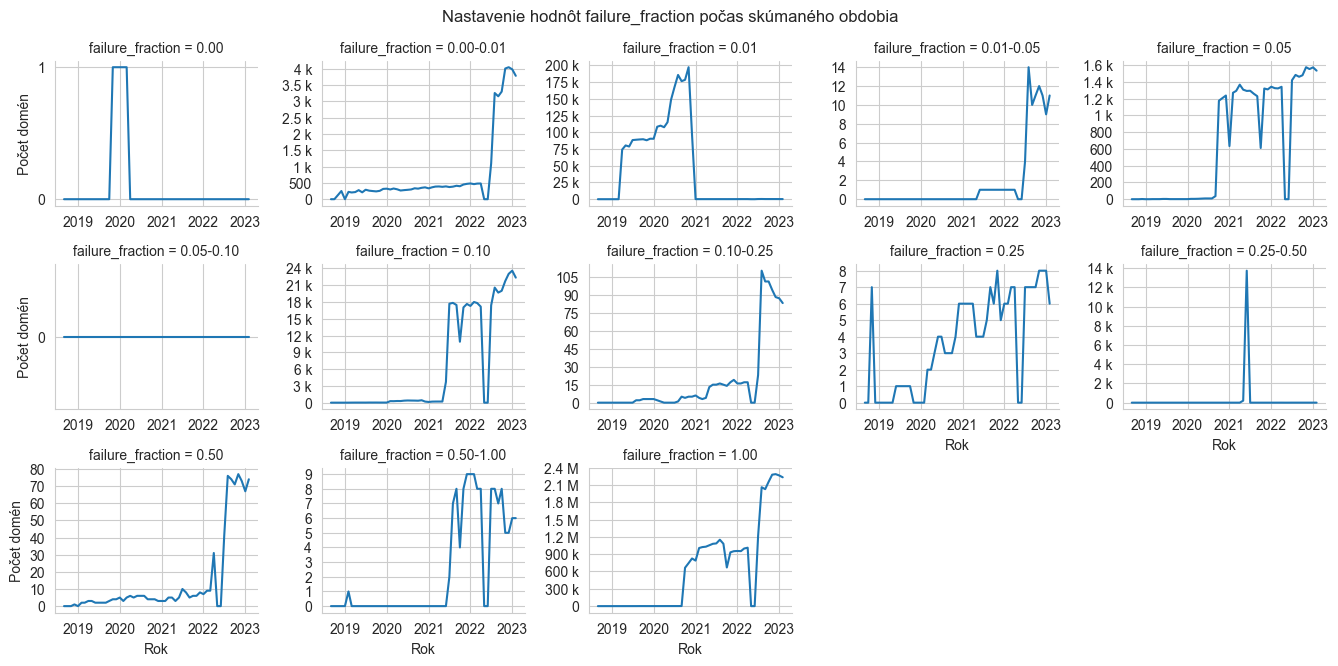

In [66]:
to_plot = ff_result.stack()
to_plot = to_plot.reset_index()
to_plot.rename(columns={'level_0': 'failure_fraction', 'level_1': 'date', 0: 'domain_count'}, inplace=True)

to_plot['date_fmt'] = to_plot['date'].map(lambda date: pd.to_datetime(date))

sns.set_style('whitegrid')

g = sns.relplot(to_plot, kind='line', x='date_fmt', y='domain_count', 
                col='failure_fraction', col_wrap=5, 
                height=2.25, aspect=1.2, 
                facet_kws={'sharey': False, 'sharex': False}
                )

for idx, ax in enumerate(g.axes):
    ax.xaxis.remove_overlapping_locs = False
    years = mdates.YearLocator()
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

    ax.xaxis.set_minor_locator(ticker.NullLocator())
    

    ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))    
    ax.yaxis.set_major_formatter(ticker.EngFormatter())    
    
    if idx == 5:
        ax.set_yticks([0])
        ax.set_yticklabels([0])
    
    ax.tick_params(axis='x', which="minor", rotation=90, labelsize=9)

g.set_xlabels("Rok")
g.set_ylabels("Počet domén")

g.figure.suptitle("Nastavenie hodnôt failure_fraction počas skúmaného obdobia")
g.tight_layout()

g.savefig("graphs/httparchive_nel_config_ff_dist.pdf")